In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read and store my database from openipf .csv
df = pd.read_csv(r'C:\Users\rbenoist\Desktop\Python-main\Code\Analyse IPF python\IPF\IPF-analysis\openipf-2022-11-26-25c7d08e.csv')

c:\Users\rbenoist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# get the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131003 entries, 0 to 1131002
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1131003 non-null  object 
 1   Sex               1131003 non-null  object 
 2   Event             1131003 non-null  object 
 3   Equipment         1131003 non-null  object 
 4   Age               817015 non-null   float64
 5   AgeClass          855285 non-null   object 
 6   BirthYearClass    867737 non-null   object 
 7   Division          1130058 non-null  object 
 8   BodyweightKg      1117700 non-null  float64
 9   WeightClassKg     1119513 non-null  object 
 10  Squat1Kg          421363 non-null   float64
 11  Squat2Kg          416966 non-null   float64
 12  Squat3Kg          406089 non-null   float64
 13  Squat4Kg          326 non-null      float64
 14  Best3SquatKg      809273 non-null   float64
 15  Bench1Kg          608959 non-null   float64
 16  

In [3]:
# have a view of data frame

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
1,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,Open,50.64,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
2,Renee Orbon,F,SBD,Single-ply,31.5,24-34,24-39,Open,55.76,56,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
3,Rikki Flanders,F,SBD,Single-ply,31.5,24-34,24-39,Open,56.42,60,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4,Julie Hallmond,F,SBD,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships


In [55]:
# User parameters

# How many athletes do we want to study ?
n_athlete = 10

# Choose mode "national" or "international"; national mode is related to the "country" value
mode = "national"

# Choose the athlete's sex "M" or "F"
sex = "M" 

# Choose athlete equipment "Raw" or "Single-ply"
equipment = "Raw"

# Choose athlete event "SBD" or "B"
event = "SBD"

# Choose athlete country related to national mode
country = "France"

# Store the different federations
federation_1 = "FFForce"
federation_2 = "IPF"
federation_3 = "EPF"
forbidden_division = "Prime Time"

# Choose the limit date of the data
end_date = "2023-01-01"

In [56]:
# Filter my table to get the 1st athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "47"
else :
    cate = "59"

# Filter my table
if mode == "national" :
    df1 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df1 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]


# Group by my table to take the max Goodlift per Athlete Name
df1 = df1.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df1 = df1.head(n_athlete)
df1

,Name,Goodlift
13,Antoine Garcia,94.15
39,Etienne Lited,93.94
119,Thomas Acher,90.45
68,Julien Gutierrez,89.20
52,Hermann Charbonnier,83.81
116,Thibault Leparc,82.74
129,Vincent Todaro,80.25
74,Loïz Gautier,79.21
43,Gael Pannier,78.81
94,Philippe La,78.06


In [57]:
# Filter my table to get the 2nd athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "52"
else :  
    cate = "66"

# Filter my table
if mode == "national" :
    df2 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df2 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df2 = df2.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df2 = df2.head(n_athlete)
df2

,Name,Goodlift
241,Panagiotis Tarinidis,109.25
127,Hassan El Belghiti,102.42
314,Thomas Acher,95.53
318,Thomas Louet,92.88
158,Julien Mercier #2,92.77
42,Arthur Hauet,92.08
334,Valentin Fruchard,91.23
15,Alexandre Tarinidis,90.41
301,Steve Vigouroux,89.95
112,Frédéric Mannequin,89.89


In [58]:
# Filter my table to get the 3rd athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "57"
else :
    cate = "74"

# Filter my table
if mode == "national" :
    df3 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df3 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df3 = df3.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df3 = df3.head(n_athlete)
df3

,Name,Goodlift
526,Paul Rembauville,106.81
280,Hassan El Belghiti,104.81
6,Adrien Poinson,102.26
514,Panagiotis Tarinidis,101.50
40,Andréa Bonetto,100.52
81,Bastien Poyet,100.42
378,Khaled Benbachir,99.22
18,Alexandre Pont,98.88
124,Charly Mairesse,98.76
233,Florian Magnier,97.86


In [59]:
# Filter my table to get the 4th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "63"
else :
    cate = "83"

# Filter my table
if mode == "national" :
    df4 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df4 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df4 = df4.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df4 = df4.head(n_athlete)
df4

,Name,Goodlift
858,Yanis Bouchou,108.75
674,Pierre Renaud,103.54
841,Valentin Cure,103.31
764,Souleiman Turki,103.09
721,Romain Picot-Guéraud,100.28
563,Maxime Girard,99.97
803,Thomas Czaplicki,99.49
425,Joris Quai,98.88
344,Guillaume Parisot,98.70
55,Anthony Costarigot,98.57


In [60]:
# Filter my table to get the 5th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "69"
else : 
    cate = "93"

# Filter my table
if mode == "national" :
    df5 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df5 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df5 = df5.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df5 = df5.head(n_athlete)
df5

,Name,Goodlift
533,Richmond Baiden,107.60
324,Julien Balangwe Bakinien,105.00
31,Ali Ben Hadj Ali,103.79
526,Quentin Gilbert,102.78
256,Guillaume Parisot,99.91
241,Gil Pinheiro,99.76
495,Paco Castillo,99.70
229,Gabriel Begue,99.28
80,Benjamin Hennequin,98.83
398,Malik Bernoussi Triolet,98.28


In [61]:
# Filter my table to get the 6th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "76"
else :  
    cate = "105"

# Filter my table
if mode == "national" :
    df6 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df6 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df6 = df6.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df6 = df6.head(n_athlete)
df6

,Name,Goodlift
62,Corentin Clément,111.11
20,Ali Ben Hadj Ali,106.42
246,Nicolas Peyraud,104.06
293,Sofiane Belkesir,103.65
162,Julien Balangwe Bakinien,100.47
277,Quentin Gilbert,99.65
37,Benoit Carole,98.48
288,Sami Maury,98.16
342,Youssuf El Adlani,96.73
38,Benoit Carthago,96.25


In [62]:
# Filter my table to get the 7th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "84"
else :
    cate = "120"

# Filter my table
if mode == "national" :
    df7 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df7 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df7 = df7.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df7 = df7.head(n_athlete)
df7

,Name,Goodlift
98,Nicolas Peyraud,107.29
31,Corentin Clément,103.15
120,Sofiane Belkesir,98.32
25,Charly Boucher,94.86
130,Tony Bayrakcioglu,93.35
52,Frédéric Lecellier,92.94
13,Antoine De Rohden,92.25
100,Nour-Eddine Ghaoui,89.42
91,Marcus Feliho,88.76
80,Karim Messai,88.44


In [63]:
# Filter my table to get the 8th athlete category

# Take the right weight class related to the sex
if sex == "F" :
    cate = "84+"
else :
    cate = "120+"

# Filter my table 
if mode == "national" :
    df8 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df8 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df8 = df8.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top n_athlete of my table
df8 = df8.head(n_athlete)
df8

,Name,Goodlift
49,Romuald Massé,95.89
52,Stanley Odin,94.33
56,Ugo Masarotti,90.86
28,Julien Moala,89.24
41,Nour-Eddine Ghaoui,89.23
43,Paulin Mbakop Kweffo,88.72
1,Abdellah Hassar,88.47
30,Karim Messai,86.49
61,Éric Bonin,83.96
0,Abdelaziz Benikken,82.84


In [64]:
# Store my result in an excel file
with pd.ExcelWriter(r"C:\Users\rbenoist\Desktop\data\IPF\results.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    df1.to_excel(writer, header="47", sheet_name="47")
    df2.to_excel(writer, sheet_name="52")
    df3.to_excel(writer, sheet_name="57")
    df4.to_excel(writer, sheet_name="63")
    df5.to_excel(writer, sheet_name="69")
    df6.to_excel(writer, sheet_name="76")
    df7.to_excel(writer, sheet_name="84")
    df8.to_excel(writer, sheet_name="84+")

([<matplotlib.axis.XTick at 0x1c0403894f0>,
 [Text(1, 0, '59'),
  Text(2, 0, '66'),
  Text(3, 0, '74'),
  Text(4, 0, '83'),
  Text(5, 0, '93'),
  Text(6, 0, '105'),
  Text(7, 0, '120'),
  Text(8, 0, '120+')])

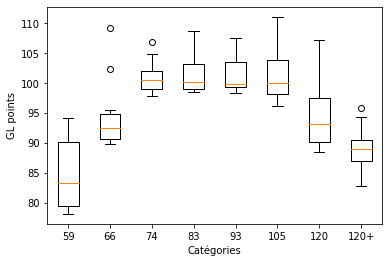

In [65]:
# Name my categories depending on "Sex" value
if sex == "F" :
    bars = ('47', '52', '57', '63', '69', '76', '84', '84+')
else :
    bars = ('59', '66', '74', '83', '93', '105', '120', '120+')

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

# Plot a boxplot with top n-athlete per category
plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ]
)

# Name my labels
plt.ylabel('GL points')
plt.xlabel('Catégories')

# Adjust y axis
# plt.ylim([90, 140])

# Name my xticks according to my "bars" value
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

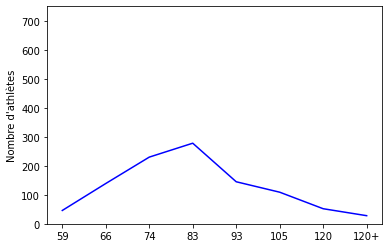

In [66]:
# Display number of athletes per categories
n_cate = np.array([46, 139, 230, 278, 145, 109, 52, 28])

plt.ylim([0, 750])
plt.ylabel("Nombre d'athlètes")
t = plt.ylabel("Nombre d'athlètes");
plt.plot(bars, n_cate, color = 'blue')

([<matplotlib.axis.XTick at 0x1c03fb63dc0>,
 [Text(1, 0, '59'),
  Text(2, 0, '66'),
  Text(3, 0, '74'),
  Text(4, 0, '83'),
  Text(5, 0, '93'),
  Text(6, 0, '105'),
  Text(7, 0, '120'),
  Text(8, 0, '120+')])

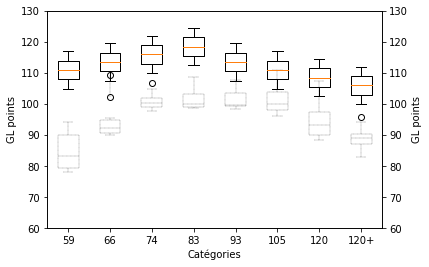

In [67]:
# Display 2 boxplots on same graph
plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ], 
    boxprops= dict(linestyle='--',linewidth=0.25, color='black'),
    whiskerprops=dict(linestyle='--',linewidth=0.25, color='black'),
    medianprops = dict(linestyle='--', linewidth=0.25, color='black'),
    capprops = dict(linestyle='--', linewidth=0.25, color='black'),
    flierprops = dict(linestyle='--', linewidth=0.25, color='black')
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)


# both boxplot
plt.twinx()
a = np.arange(105, 117.5, 1).tolist()
b = np.arange(107.5, 120, 1).tolist()
c = np.arange(110, 122.5, 1).tolist()
d = np.arange(112.5, 125, 1).tolist()
e = np.arange(107.5, 120, 1).tolist()
f = np.arange(105, 117.5, 1).tolist()
g = np.arange(102.5, 115, 1).tolist()
h = np.arange(100, 112.5, 1).tolist()
plt.boxplot(
    [
    a,
    b,
    c,
    d,
    e,
    f,
    g,
    h
    ], widths = 0.5
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)